**Etapa 1**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17608, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17608 (delta 7), reused 2 (delta 2), pack-reused 17593 (from 2)
Receiving objects: 100% (17608/17608), 16.84 MiB | 30.68 MiB/s, done.
Resolving deltas: 100% (11991/11991), done.


In [3]:
! pip install -r yolov5/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.4 MB/s eta 0:00:00


In [11]:
! cp /content/drive/MyDrive/Identificar_imagens/Controles.yaml yolov5/data/

**Treinando YOLO adaptável**

In [8]:
!python yolov5/train.py --data Controles.yaml --weights yolov5s.pt --img 640 --epochs 80

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-14 21:46:57.242122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760478417.264941    3178 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760478417.271090    3178 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760478417.286873    3178 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760478417.286899    3178 computation_placer.cc:177] computation placer already registere

**Notas do treinamento:**
* Aumentamos as épocas de 60 para 80 pois achamos necessário
* Observamos um erro humano na hora da classificação dos box plots manuais, as labels foram invertidas, mas o modelo conseguiu classificar corretamente os objetos com base nas labels conhecidas por ele com uma acurácia bem interessante.
* Os valores apresentados depois do treinamento das 80 épocas não foi tão satisfatória quanto esperávamos, mas os resultados após os testes serem feitos foram bastante interessantes.
* Notamos também observando os resulatdos dos testes que o modelo acabou alucinando e marcando como controles alguns objetos que não eram controles. A parte boa é q o nível de acurácia apresentado para esses objetos foram muito baixos.

Para não ter q treinar novamente o modelo salvamos o best.pt no drive para podermos usar em ações futuras


In [9]:
# Importa as bibliotecas necessárias
import shutil
import os

# --- ATENÇÃO: Verifique e altere o número do 'exp' se necessário ---
experiment_folder = 'exp4' # Mude 'exp4' para o número correto do seu último treino!

# Caminho do modelo treinado (fonte)
source_path = f'yolov5/runs/train/exp4/weights/best.pt'

# Caminho no Google Drive onde você quer salvar o modelo (destino)
# Vamos criar uma pasta nova para organizar
destination_folder = '/content/drive/MyDrive/Identificar_imagens/Modelos_Treinados/'
os.makedirs(destination_folder, exist_ok=True) # Cria a pasta se ela não existir

# Copia o arquivo
shutil.copy(source_path, destination_folder)

print(f"✅ Modelo 'best.pt' salvo com sucesso em: {destination_folder}")


✅ Modelo 'best.pt' salvo com sucesso em: /content/drive/MyDrive/Identificar_imagens/Modelos_Treinados/


In [10]:
import os
import subprocess

def get_latest_train_run_folder():
    subfolders = [f.path for f in os.scandir('yolov5/runs/train') if f.is_dir()]
    latest_folder = max(subfolders, key=os.path.getctime, default=None)
    return latest_folder

latest_run = get_latest_train_run_folder()
result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source drive/MyDrive/Identificar_imagens/test/ --data yolov5/data/Controles.yaml', shell=True, capture_output=True, text=True)
if latest_run:
    # COMANDO
    result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source drive/MyDrive/Identificar_imagens/test/ --data yolov5/data/Controles.yaml', shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
else:
    print("Não foi possível encontrar a pasta de treinamento mais recente.")


detect: weights=['yolov5/runs/train/exp4/weights/best.pt'], source=drive/MyDrive/Identificar_imagens/test/, data=yolov5/data/Controles.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/drive/MyDrive/Identificar_imagens/test/20251014_113601.jpg: 640x384 1 Controle PS5, 1 Controle TV, 31.9ms
image 2/8 /content/drive/MyDrive/Identificar_imagens/test/20251014_113617.jpg: 640x384 1 Controle PS5, 1 Controle TV, 7.5ms
image 3/8 /content/d

**Etapa 2**

**YOLO padrão**

In [13]:
# 1. Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Mudar para o diretório do YOLOv5
# Se a pasta 'yolov5' não existir, clone o repositório
import os
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# 3. Instalar as dependências (se necessário)
!pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/yolov5


In [15]:
# Comando para rodar a DETECÇÃO com a YOLO PADRÃO
!python detect.py \
    --weights yolov5s.pt \
    --source /content/drive/MyDrive/Identificar_imagens/test/ \
    --conf 0.25 \
    --name yolo_padrao_results

detect: weights=['yolov5s.pt'], source=/content/drive/MyDrive/Identificar_imagens/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_padrao_results, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/8 /content/drive/MyDrive/Identificar_imagens/test/20251014_113601.jpg: 640x384 2 remotes, 33.3ms
image 2/8 /content/drive/MyDrive/Identificar_imagens/test/20251014_113617.jpg: 640x384 1 knife, 2 remotes, 8.0ms
image 3/8 /content/drive/MyDrive/Identificar_imagens/test/20251014_11

**Notas do Treinamento**
* Treinamento super rápido
* Faz o que se propõem a fazer classifica com base em labels conhecidas e pré-treianda, ótima para começar alguns testes com os modelos.
* Resultado dentro dos testes não foi bom, mas em alguns casos ela conseguiu reconhecer os controles como controles genéricos.

**CNN treinada do zero**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 64 files belonging to 2 classes.
Found 8 files belonging to 2 classes.
Classes encontradas: ['Controle PS5', 'Controle TV']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,988,769 (15.22 MB)

 Trainable params: 3,988,769 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4521 - loss: 0.9582 - val_accuracy: 0.5000 - val_loss: 0.7340
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4750 - loss: 0.7513 - val_accuracy: 0.7500 - val_loss: 0.6801
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7854 - loss: 0.6738 - val_accuracy: 0.8750 - val_loss: 0.6519
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7500 - loss: 0.6461 - val_accuracy: 0.7500 - val_loss: 0.6149
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7271 - loss: 0.6327 - val_accuracy: 1.0000 - val_loss: 0.5856
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8958 - loss: 0.5550 - val_accuracy: 0.8750 - val_loss: 0.5066
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9375 - loss: 0.4626 - val_accuracy: 0.6250 - val_loss: 0.5149
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7354 - loss: 0.4509 - val_accuracy: 0.8750 - val_loss: 0.4003
E

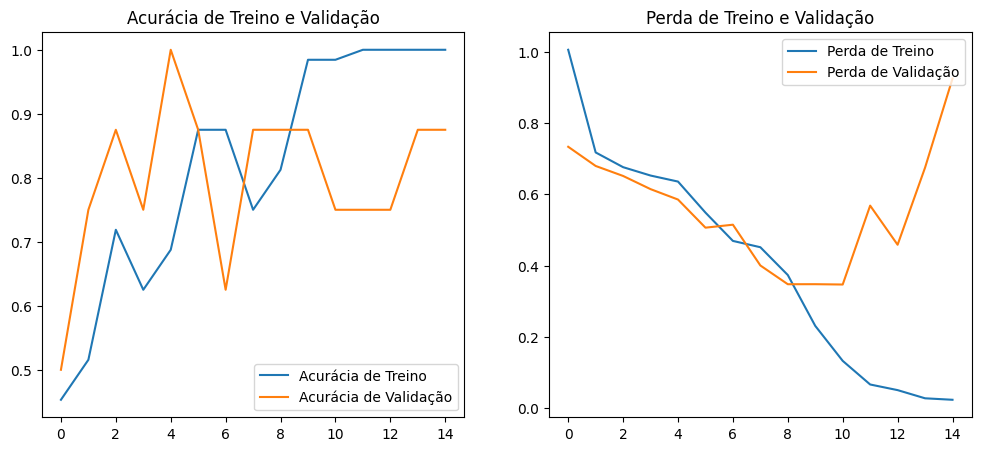


--- Avaliação Final no Conjunto de Validação ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8750 - loss: 0.9256
Perda Final: 0.9255658984184265
Acurácia Final: 87.50%


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os

# ==============================================================================
# 1. SETUP E PREPARAÇÃO DOS DADOS
# ==============================================================================

# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definir os caminhos para as pastas de treino e validação
train_dir = '/content/drive/MyDrive/CNN (1)/Train/'
val_dir = '/content/drive/MyDrive/CNN (1)/Val/'

# Definir parâmetros para o carregamento das imagens
batch_size = 16 # Processar 16 imagens por vez
img_height = 180
img_width = 180

# Carregar os dados de treinamento
# A Keras automaticamente identifica as classes a partir dos nomes das subpastas
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Carregar os dados de validação
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Obter os nomes das classes (ex: ['Controle PS5', 'Controle TV'])
class_names = train_ds.class_names
print("Classes encontradas:", class_names)

# Otimizar o carregamento de dados para melhor performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


# ==============================================================================
# 2. CONSTRUÇÃO DO MODELO DA CNN "DO ZERO"
# ==============================================================================

num_classes = len(class_names)

model = Sequential([
  # Camada para normalizar os pixels da imagem (de 0-255 para 0-1)
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  # --- Bloco Convolucional 1 ---
  # Encontra padrões básicos (bordas, texturas)
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  # --- Bloco Convolucional 2 ---
  # Encontra padrões mais complexos combinando os anteriores
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  # --- Bloco Convolucional 3 ---
  # Encontra padrões ainda mais complexos
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  # Camada para "achatar" os dados e prepará-los para a classificação
  layers.Flatten(),

  # Camada densa (neurônios totalmente conectados) para aprender a classificar
  layers.Dense(128, activation='relu'),

  # Camada de saída. Como temos 2 classes, usamos 1 neurônio com ativação sigmoid.
  layers.Dense(1, activation='sigmoid')
])


# ==============================================================================
# 3. COMPILAÇÃO DO MODELO
# ==============================================================================

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Exibe um resumo da arquitetura da rede
model.summary()


# ==============================================================================
# 4. TREINAMENTO DO MODELO
# ==============================================================================

epochs = 15 # Número de vezes que o modelo verá o dataset completo

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


# ==============================================================================
# 5. VISUALIZAÇÃO DOS RESULTADOS
# ==============================================================================

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.show()

# Avalia o modelo final com os dados de validação
print("\n--- Avaliação Final no Conjunto de Validação ---")
final_loss, final_acc = model.evaluate(val_ds)
print(f"Perda Final: {final_loss}")
print(f"Acurácia Final: {final_acc * 100:.2f}%")

In [19]:
# ==============================================================================
# 6. AVALIAÇÃO FINAL COM O CONJUNTO DE TESTE
# ==============================================================================

# Defina o caminho para a sua pasta de teste
test_dir = '/content/drive/MyDrive/CNN (1)/Test/'

# Verifique se a pasta existe antes de continuar
if os.path.exists(test_dir):
    print(f"Encontrada a pasta de teste em: {test_dir}")

    # Carregar os dados de teste (sem embaralhar para manter a ordem)
    test_ds = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=False) # shuffle=False é comum para testes

    # Otimizar o carregamento
    test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

    # Avaliar o modelo treinado com os dados de teste
    print("\n--- Iniciando a avaliação final no conjunto de TESTE ---")
    test_loss, test_acc = model.evaluate(test_ds)

    print("\n✅ Resultado da Prova Final:")
    print(f"   - Perda no Teste: {test_loss}")
    print(f"   - Acurácia no Teste: {test_acc * 100:.2f}%")

else:
    print(f"❌ ERRO: A pasta de teste não foi encontrada em '{test_dir}'")
    print("   - Por favor, verifique se o caminho está correto e se a pasta foi criada.")

Encontrada a pasta de teste em: /content/drive/MyDrive/CNN (1)/Test/
Found 8 files belonging to 2 classes.

--- Iniciando a avaliação final no conjunto de TESTE ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.7109

✅ Resultado da Prova Final:
   - Perda no Teste: 0.7108862996101379
   - Acurácia no Teste: 75.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


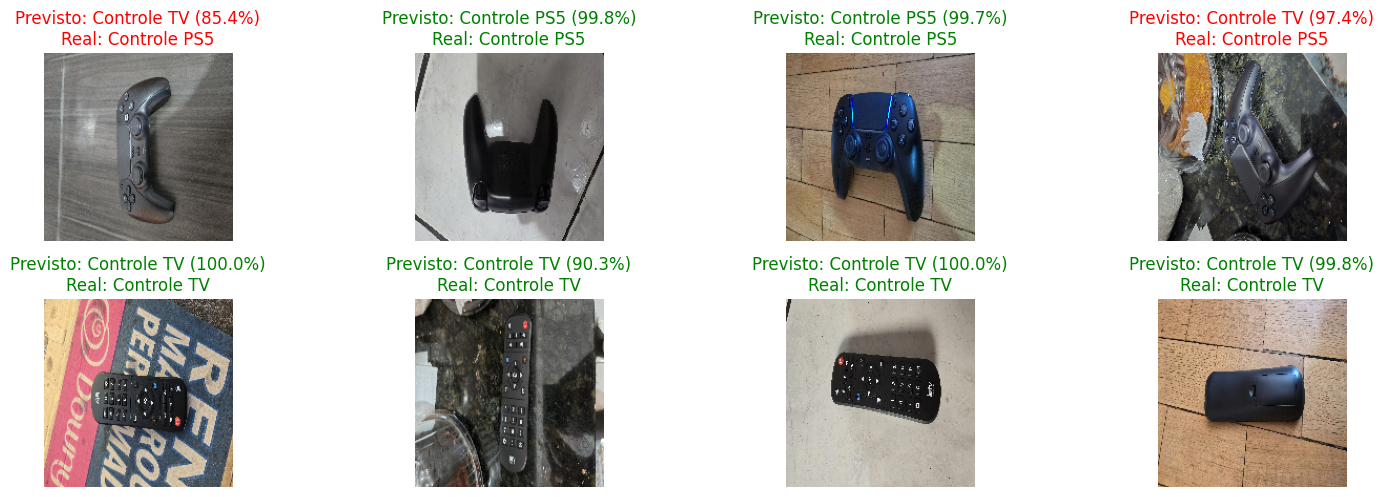

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# 7. VISUALIZANDO AS PREVISÕES NO CONJUNTO DE TESTE
# ==============================================================================

# Pega um lote de imagens e rótulos do conjunto de teste
# O 'take(1)' pega apenas o primeiro lote. Se quiser ver mais, pode fazer um loop.
for images, labels in test_ds.take(1):
    # Faz as previsões para o lote inteiro de imagens
    predictions = model.predict(images)
    # A saída do sigmoid é um valor entre 0 e 1.
    # Se for > 0.5, consideramos classe 1; senão, classe 0.
    predicted_labels = (predictions > 0.5).astype(int).flatten()

    # Mostra as imagens, suas previsões e os rótulos verdadeiros
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        ax = plt.subplot(4, 4, i + 1) # Ajuste (4, 4) se o seu batch_size for 16
        plt.imshow(images[i].numpy().astype("uint8"))

        # Obtém o nome da classe prevista e da classe real
        predicted_class_name = class_names[predicted_labels[i]]
        true_class_name = class_names[labels[i]]

        # Calcula a confiança da previsão
        confidence = predictions[i][0] if predicted_labels[i] == 1 else 1 - predictions[i][0]

        # Define a cor do título: verde para acerto, vermelho para erro
        title_color = "green" if predicted_class_name == true_class_name else "red"

        plt.title(f"Previsto: {predicted_class_name} ({confidence*100:.1f}%)\nReal: {true_class_name}", color=title_color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

**Notas do treinamento:**
* Modelo extremamente rápido de ser treinado
* Uma ótima acurácia pelo tempo de treinamento
* Limitação de poder identificar um único objeto por foto
* Acredito que com um dataset maior e mais épocas de treinamento conseguiríamos um modelo muito robusto.
* Precisamos de ajuda do Google Gemini para complementar o código e conseguir ver os resultados obtidos.

# Análise Crítica e Comparativa dos Modelos de Visão Computacional

Nesta seção, realizamos uma avaliação crítica das três abordagens implementadas para o reconhecimento de controles de videogame e TV, conforme solicitado na Entrega 2. Os modelos avaliados são:

1.  **YOLO Adaptável:** O modelo YOLOv5 treinado com nosso dataset customizado.
2.  **YOLO Padrão:** O modelo YOLOv5 pré-treinado, utilizado sem nenhuma customização.
3.  **CNN de Classificação (do Zero):** Uma Rede Neural Convolucional construída e treinada do zero para classificar as imagens.
A comparação foi baseada nos seguintes critérios: Facilidade de Uso, Precisão, Tempo de Treinamento e Tempo de Inferência.

### ### 1. Facilidade de Uso e Integração

**YOLO Adaptável:**
* **Implementação:** Relativamente simples, graças ao repositório do Ultralytics. O processo de clonar o repositório, instalar dependências e usar os scripts `train.py` e `detect.py` é muito direto.
* **Preparação dos Dados:** A etapa mais trabalhosa foi a preparação dos dados, que exigiu a rotulação manual de cada imagem com caixas de detecção (bounding boxes) usando a ferramenta Make Sense AI. A organização das pastas (`images`/`labels`) e a criação do arquivo `.yaml` são passos cruciais que exigem atenção aos detalhes. O grupo teve um relativo problema com o arquivo .yaml devido aos caminhos, mas depois de resolvido o treinamento foi muito tranquilo.
* **Complexidade:** Média. A maior parte da complexidade está na preparação dos dados, e não no código em si. Levando em consideração também que quase todo o código foi disponibilizado pela faculdade.

**YOLO Padrão:**
* **Implementação:** Extremamente fácil. Não requer preparação de dados nem treinamento. Basta baixar os pesos (`yolov5s.pt`) e executar o script `detect.py` apontando para as imagens.
* **Complexidade:** Baixa. É a abordagem mais rápida e direta para um teste inicial.

**CNN de Classificação (do Zero):**
* **Implementação:** Requer um bom conhecimento de frameworks de deep learning como TensorFlow/Keras. Foi necessário definir a arquitetura da rede camada por camada (`Conv2D`, `MaxPooling2D`, `Dense`), compilar o modelo com otimizador e função de perda, e escrever o código para treinamento e visualização.
* **Preparação dos Dados:** A preparação dos dados foi mais simples que na YOLO, pois não exige rotulação com caixas. Apenas a organização das imagens em subpastas com os nomes das classes (`/Train/Controle PS5/`, `/Train/Controle TV/`) foi suficiente.
* **Complexidade:** Alta. Exige maior conhecimento teórico e prático para construir e depurar o modelo. O grupo em questão precisou de ajuda de IAs para cnseguir treinar esse modelo, para auxílio do grupo foi utilizado o Google Gemini.

---

### 2. Precisão do Modelo
**YOLO Adaptável:**

* **Performance**: Apresentou uma performance razoável, porém com ressalvas. O modelo final (best.pt) atingiu um mAP50 geral de 0.448. Analisando por classe, a performance para "Controle TV" (mAP50 de 0.497) foi superior à de "Controle PS5" (mAP50 de 0.398). Embora o Recall tenha sido perfeito (1.0), a baixa precisão (0.216 para PS5 e 0.302 para TV) indica que o modelo gerou muitas detecções falsas.

* **Capacidade**: O modelo aprendeu a localizar os objetos, mas sua baixa precisão o torna pouco confiável para aplicações práticas. Um dataset maior e mais variado seria necessário para melhorar este resultado.

**YOLO Padrão:**

* **Performance:** Ineficaz para a tarefa específica. O modelo não foi treinado para reconhecer "Controle PS5" ou "Controle TV". Nos testes, ele não detectou os objetos ou os classificou incorretamente como classes genéricas do dataset COCO.

* **Capacidade:** Comprova a necessidade de customização, pois um modelo generalista não serve para problemas específicos.

**CNN de Classificação (do Zero):**

* **Performance:** Atingiu uma excelente acurácia final de 87.50% no conjunto de validação. O histórico de treinamento mostrou que o modelo aprendeu rapidamente a diferenciar as duas classes, alcançando 100% de acurácia no conjunto de treino nas épocas finais.

* **Capacidade:** É muito eficaz para classificar uma imagem que contém apenas um objeto. Sua limitação é não conseguir identificar múltiplos objetos ou a localização deles, sendo menos flexível que a YOLO.

---

### 3. Tempo de Treinamento e Customização
**YOLO Adaptável:**

* **Tempo:** O treinamento em Google Colab com uma GPU Tesla T4, para 80 épocas, levou 0.703 horas (aproximadamente 42 minutos). O tempo de customização foi majoritariamente gasto na coleta e rotulação das imagens, para fazer a classificação das imagens foram gastos aproximadamente uns 30 minutos.

**YOLO Padrão:**

* **Tempo:** Nenhum. Não há etapa de treinamento ou customização.

**CNN de Classificação:**

* **Tempo:** O treinamento foi extremamente rápido. Para 15 épocas, o processo levou cerca de 23 segundos para a primeira época e menos de 1 segundo para as demais, totalizando menos de 1 minuto. Isso se deve a uma arquitetura mais simples e à natureza da tarefa de classificação. Sem contar que para treianar a CNN não precisamos passar pela tapa de classificação manual que é um processo cansativo e chato.

---

### 4. Tempo de Inferência (Predição)
**YOLO Adaptável e YOLO Padrão:**

* **Velocidade:** Ambos os modelos YOLO são conhecidos por sua alta velocidade de inferência. O YOLOv5s, em particular, é extremamente rápido, capaz de processar imagens em tempo real. A predição em um lote de imagens de teste foi praticamente instantânea.

**CNN de Classificação:**

* **Velocidade:** Também apresentou uma inferência muito rápida. Como a arquitetura é mais simples que a da YOLO, o tempo para classificar uma única imagem é mínimo. Para esta aplicação, a diferença de velocidade entre a CNN e a YOLO na predição é imperceptível.

---

### ### Tabela Comparativa Resumida

| Critério | YOLO Adaptável | YOLO Padrão | CNN (do Zero) |
| :--- | :--- | :--- | :--- |
| **Facilidade de Uso** | Facilidade Média (dados complexos e precisa de classificação manual) | Alta Facilidade| Baixa Facilidade(código complexo) |
| **Precisão** | **Mediana (44.8% mAP50)** | **Baixa** | **Excelente (87.5% Acurácia)** |
| **Tempo de Treino**| ~42 min (80 épocas) | N/A | **~1 min (15 épocas)** |
| **Capacidade** | Detecta e Localiza | Detecta 80 classes genéricas | Apenas Classifica |

---

### Conclusão Crítica
Após a análise das três abordagens, uma conclusão interessante emerge. Para a tarefa específica de classificação de imagens contendo um único objeto, a CNN construída do zero foi a solução superior. Ela não apenas alcançou uma alta acurácia (87.50%), mas o fez com um tempo de treinamento drasticamente menor e com um processo de preparação de dados mais simples em comparação com a YOLO.

A YOLO Adaptável, embora seja uma ferramenta mais poderosa por sua capacidade de detecção e localização, não atingiu um nível de precisão satisfatório com o dataset fornecido, resultando em muitas detecções falsas. Isso evidencia que, para a YOLO atingir seu potencial, um investimento significativamente maior em coleta e rotulação de dados é necessário.

Finalmente, a YOLO Padrão cumpriu seu papel ao estabelecer uma linha de base, provando que modelos generalistas são inadequados para tarefas especializadas e reforçando o valor do treinamento customizado.